In [1]:
import tellurium as te
import ipywidgets as wid
import numpy as np
import matplotlib.pyplot as plt

# Viral Kinetics: Competition Between Infections for Limited Resources
Though one might not conceptualize themself this way, to a viral infection, a person represents a source of finite resources. In any ecosystem, competition for a finite resource will be a defining factor in the growth of populations. What effect will this dynamic have on viruses? In this module you will learn about the effects of competition on virus populations within the lungs and the methods of simulation used to see these effects.


Replication of:

Coinfections of the Respiratory Tract: Viral Competition for Resources

Pinky L, Dobrovolny HM (2016) Coinfections of the Respiratory Tract: Viral Competition for Resources. PLOS ONE 11(5): e0155589. https://doi.org/10.1371/journal.pone.0155589

## Single Infection Model
#### Biological Background

Before understanding viral co-infection, we must first begin by understanding the process by which an infection by only one virus occurs. For many who are reading this, the process of viral infection is something you are likely familiar with in the broad strokes we will be covering here and, if so, this explanation can be skipped. Viruses are actually a strange thing to categorize. In fact, many do not even label viruses as something living. For our purposes they can be most easily understood as a microscopic parasite that has no method of reproduction on its own and so must hijack the infrastructure of a cell to make more of itself. When a cell is producing viruses like this, we refer to it as infected. When an organism has infected cells in an area of its body, we say that it has an infection there. Though our simulations will be focused on viral infections of the lungs, a common target for infection for many reasons, the general mechanics of infection should largely stay the same no matter where in the body you are.
 
An infected cell, however, does not immediately begin producing and sending out viruses. Instead, there is an amount of time which varies between viruses that a cell is infected but not yet exporting any viral particles. This in-between phase is referred to as the “eclipse phase.” Once out of the eclipse phase, a cell will create new copies of the virus until it dies, either from immune response or damage done to the cell by the virus. It is particularly important to remember here that this is a system that relies on using up the cells as a resource and the cells are both finite and, due to the speed of infections as compared to the speed of cell regeneration in these infected areas, functionally non-renewable. The viral particles created by an infected cell will then go on to infect another cell or be destroyed by an immune response. There are multiple known specific and nonspecific immune responses to viral infection, but for the purposes of the models we will be using, it is only necessary to know that cells and viruses are destroyed.

#### Model Explanation

This model works by moving numbers from one population to another, which doesn’t sound very exciting or complex, I know, but this is the most involved we will get in explaining a model here, so we’ll take it slowly. Let’s start with the populations: 

$T$ **represents the “target cells,” uninfected cells in the lung that can be infected.** This population begins the simulation at a nonzero number.

$E$ **represents the “eclipse cells,” cells that, as discussed above, are in the eclipse phase and are infected but not producing viruses.** This population begins the simulation at zero.

$I$ **represents the population of cells that are alive and producing viruses.** This population begins the simulation at zero.

$V$ **represents the active viral particles in the lung that can infect healthy cells.** This population begins the simulation at a nonzero number.



Now that we’ve explained the populations in the simulation, let’s see how they interact with each other, starting with the target cells:

$\frac{dT}{dt}=-\beta*T*V$

$\beta$ **represents the rate of infection for a virus- how fast the virus can infect a cell.**

Now, if you, like me, haven’t taken a calculus course in a while, seeing derivatives will make it seem a bit intimidating at first glance, but don’t worry; it’s quite simple. This equation is showing how fast cells are lost from the “target cell” population ($T$) as time passes ($t$). In this model, the only way that this happens is through infection, so the speed at which this happens would depend naturally upon the amount of target cells available ($T$), the amount of virus available ($V$) and the speed at which a virus can infect a cell ($β$). That’s all there is to it!

$\frac{dE}{dt}=\beta*T*V-k*E$

$k$ controls the amount of time it takes for an eclipse cell to start producing virus, but it’s a bit tricky! $\frac{1}{k}$ **is actually what represents the length of time the eclipse phase lasts**, so a higher $k$ means a shorter eclipse time.

Notice something familiar? $\beta*T*V$ is back, this time the rate at which new eclipse cells are added. This connection means that all lost target cells simply become eclipse cells in a one-to-one change. Meanwhile, eclipse cells are lost from the population ($E$) based on the time it takes for them to transition to virus-producing cells ($k$). I wonder if we’ll see those cells again somewhere else, too?

$\frac{dI}{dt}=k*E-\delta*I$

$\delta$ controls the lifespan of an infectious cell, but like $k$, $\frac{1}{\delta}$ **is what actually represents the length of that lifespan.**

There $k*E$ is! Unsurprisingly, we can see that lost eclipse cells ($E$) directly become the virus-producing infected cells ($I$). Strange that $V$, the population representing the virus, isn’t present here, though, right? Well, remember that the virus population does not directly make these kinds of cells, causing only the precursor eclipse cells, and the lifespan of an infected cell isn’t dependent on the amount of viruses around it. Knowing this, it follows that $V$ has no direct presence in the change in the virus-producing population over time.

$\frac{dV}{dt}=p*I-c*V$

$p$ **represents how much virus a single virus-producing cell makes over time.**

$c$ **represents the rate at which viruses die, whether from immune response or otherwise.**

This population is a bit of a black sheep, isn’t it? The previous three moved directly from one to another but this one does not follow that pattern. That’s because each virus-producing infected cell ($I$) produces a certain amount of virus over time ($p$) without necessarily being destroyed or entirely converted in the process. Meanwhile the amount of virus destroyed, dependant on the rate at which it is destroyed ($c$) and how much there is of it ($V$), does not go anywhere or is converted into anything else.

With all that explained, here's a graph we can get of the growth of viral material in the lungs over time based on data collected from people infected with respiratory syncytial virus (RSV):

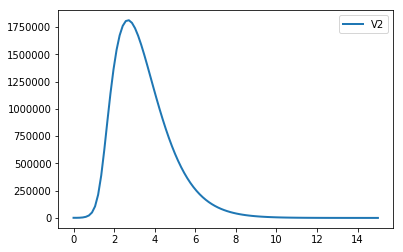

In [12]:
model1 = '''
    //Equations
    J1: T -> E1 ; B1 * T * V1 ;
    J2: T -> E2 ; B2 * T * V2 ;
    
    J3: E1 -> I1 ; k1 * E1 ;
    J4: E2 -> I2 ; k2 * E2 ;

    J5: I1 -> ; d1 * I1 ;
    J6: I2 -> ; d2 * I2 ;
    
    J7: V1 -> ; c1 * V1 ;
    J8: V2 -> ; c2 * V2 ;
    
    J9: -> V1 ; p1*I1 ; 
    J10: -> V2 ; p2*I2 ;
    
    //Parameters
    B1 = 0 ;
    B2 = 0 ;
    k1 = 0 ; 
    k2 = 0 ;
    d1 = 0 ; 
    d2 = 0 ;
    c1 = 0 ; 
    c2 = 0 ;
    p1 = 0 ; 
    p2 = 0 ;
    
    
    //Initial Conditions
    T0 = 1 ; 
    T = T0 ;
    E1 = 0 ;
    E2 = 0 ;
    I1 = 0 ;
    I2 = 0 ;
    V1 = 0 ;
    V2 = 0 ;
'''
def plot_model_single(B1 = 0 ,B2 = 0 , k1 = 0 , k2 = 0 , d1 = 0 , d2 = 0, c1 = 0 , c2 = 0 , p1 = 0 , p2 = 0 ,x=0,
              T0 = 1000 , E1 = 0 , E2 = 0 , I1 = 0 , I2 = 0 , V1x = 0 , V2 = 0):
    m=te.loada(model1)
    m.B1 = B1 ; m.B2 = B2 ; m.k1 = k1 ; m.k2 = k2 ; m.d1 = d1 ; m.d2 = d2 ; m.c1 = c1 ; m.c2 = c2 ; m.p1 = p1 ; m.p2 = p2 ; m.x = x ; m.T0 = T0 ; m.E1 = E1 ; m.E2 = E2 ; m.I1 = I1 ; m.I2 = I2 ; m.V1x = V1x ; m.V2 = V2
    
    s=m.simulate(0,15,100,['Time','V2'])
    m.plot()#yscale='log')
    m.resetAll()
plot_model_single(B2 = 2.7*10**-5 , k2 =1.27, d2=1.27, p2= 8.71*10**6, c2=1.27, V2=1.14*10**3)


Notice how it grows in one certain way but then decays in another as available resources can no longer sustain the growth. All that for one graph seems a bit anticlimactic, though, doesn't it? How about you simulate a virus of your own?

#### Try it Out!
Use the sliders below to manipulate a single infection model. Can you make a viral population that never grows?

In [9]:
def plot_model_single(wn,B1 = 0 ,B2 = 0 , k1 = 0 , k2 = 0 , d1 = 0 , d2 = 0, c1 = 0 , c2 = 0 , p1 = 0 , p2 = 0 ,x=0,
              T0 = 1 , E1 = 0 , E2 = 0 , I1 = 0 , I2 = 0 , V1x = 0 , V2 = 0):
    m=te.loada(model1)
    m.B1 = 10**B1 ; m.B2 = 10**B2 ; m.k1 = k1 ; m.k2 = k2 ; m.d1 = d1 ; m.d2 = d2 ; m.c1 = c1 ; m.c2 = c2 ; m.p1 = 10**p1 ; m.p2 = 10**p2 ; m.x = x ; m.T0 = T0 ; m.E1 = E1 ; m.E2 = E2 ; m.I1 = I1 ; m.I2 = I2 ; m.V1 = V1x ; m.V2 = V2
    
    s=m.simulate(0,wn,1000,['Time','V2'])
    m.plot()#yscale='log')
    m.resetAll()

wid.interact(plot_model_single,
            B2 = wid.FloatSlider(
                            min = -10, 
                            max = -1, 
                            step=.01, 
                            description='Beta (log scale)',
                            value=-7, continuous_update=False), 
            k2 = wid.FloatSlider(
                            min = 1, 
                            max = 15, 
                            step=.1, 
                            description='k',
                            value=4.2, continuous_update=False), 
            d2 = wid.FloatSlider(
                            min = .1, 
                            max = 20, 
                            step=.1, 
                            description='Delta',
                            value=4.2, continuous_update=False),
             p2 = wid.FloatSlider(
                            min = 6, 
                            max = 11, 
                            step=.01, 
                            description='p (log scale)',
                            value=9, continuous_update=False), 
             c2 = wid.FloatSlider(
                            min = .1, 
                            max = 10, 
                            step=.1, 
                            description='c',
                            value=4, continuous_update=False), 
             V2 = wid.FloatSlider(
                            min = 1, 
                            max = 100, 
                            step=1, 
                            description='Starting viral load',
                            value=30, continuous_update=False),
            B1=wid.fixed(0),k1=wid.fixed(0),d1=wid.fixed(0),c1=wid.fixed(0),p1=wid.fixed(0),x=wid.fixed(0),T0=wid.fixed(1000),E1=wid.fixed(0),E2=wid.fixed(0),I1=wid.fixed(0),I2=wid.fixed(0),V1x=wid.fixed(0),
            wn= wid.FloatSlider(
                            min = 1, 
                            max = 100, 
                            step=1, 
                            description='Window Size',
                            value=20, continuous_update=False))
v=1

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='Window Size', min=1.0, step=1.0), FloatSlider(value=-7.0, continuous_update=False, description='Beta (log scale)', max=-1.0, min=-10.0, step=0.01), FloatSlider(value=4.2, continuous_update=False, description='k', max=15.0, min=1.0), FloatSlider(value=4.2, continuous_update=False, description='Delta', max=20.0, min=0.1), FloatSlider(value=4.0, continuous_update=False, description='c', max=10.0, min=0.1), FloatSlider(value=9.0, continuous_update=False, description='p (log scale)', max=11.0, min=6.0, step=0.01), FloatSlider(value=30.0, continuous_update=False, description='Starting viral load', min=1.0, step=1.0), Output()), _dom_classes=('widget-interact',))

#### Think About It
What do each of the variables represent? When you have simulated a virus that does not grow, what are the variables set to? Why does it make sense that a virus with these properties would not be successful infecting someone?

## Double infection model
#### Biological Background
With the single infection model out of the way, our focus can turn to the double infection model. One infection in the lungs, unfortunately, does not mean that a second infection at the same time is impossible; if healthy cells are available, a virus can infect them. This phenomenon in which more than one virus infects an area is known as co-infection. Just because a virus can infect at the same time as another does not mean that it will be successful at doing so, though. Below is a graph of the double simulation for influenza and respiratory syncytial virus (RSV).

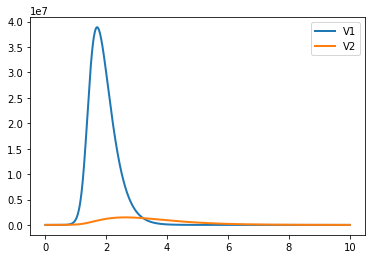

In [4]:
def plot_model_double(wn,B1 = 0 ,B2 = 0 , k1 = 0 , k2 = 0 , d1 = 0 , d2 = 0, c1 = 0 , c2 = 0 , p1 = 0 , p2 = 0 ,x=0,
              T0 = 1 , E1 = 0 , E2 = 0 , I1 = 0 , I2 = 0 , V1x = 0 , V2 = 0):
    m=te.loada(model1)
    m.B1 = B1 ; m.B2 = B2 ; m.k1 = k1 ; m.k2 = k2 ; m.d1 = d1 ; m.d2 = d2 ; m.c1 = c1 ; m.c2 = c2 ; m.p1 = p1 ; m.p2 = p2 ; m.x = x ; m.T0 = T0 ; m.E1 = E1 ; m.E2 = E2 ; m.I1 = I1 ; m.I2 = I2 ; m.V1 = V1x ; m.V2 = V2
    
    s=m.simulate(0,wn,1000,['Time','V1','V2'])
    m.plot()#yscale='log')
    m.resetAll()
    
plot_model_double(wn=10,B1 = 2.85 * 10**-7 , B2 = 2.7 * 10**-5 , k1 = 4.2 , k2 = 1.27 , d1 = 4.2 , d2 = 1.27 , c1 = 4.03 , c2 = 1.27 , p1 = 3.47 * 10**9 , p2 = 8.71 * 10**6, 
                 V1x=29,V2 = 1.14 * 10**3)



Why is RSV doing so poorly?  Remember that the lungs’ cells are a finite resource for a virus. If a cell has already been used up by the faster-growing influenza, then the RSV can not itself use that cell. As a result, the two must compete for faster dwindling resources and the RSV simply can’t keep up.

It should be noted here that there are many interesting dynamics between infections. One virus might be largely unsuccessful and prime the immune system for a second infection that would’ve been more successful otherwise. Another might be largely non-threatening but disable the immune system so that a more serious virus can take hold. Two viruses might compete for different kinds of cells within the lung. This model, however, is for now interested in only the effects of competition on the growth of these viruses.

#### Model Explanation

Speaking of the model, this is much less complicated, conceptually, than one would probably first believe. All we are doing is running two different viral models on the same target cell population. Whereas in the single model with only one virus, there was only the one $V$ or $E$ population representing the virus and eclipse cells infected by that virus, for example, there is now a $V$<sub>1</sub> and $V$<sub>2</sub> population as well as an $E$<sub>1</sub> and $E$<sub>2</sub> for the respective virus’s populations. The same is true of the parameters; rather than one $k$, there are now two different $k$’s for each virus. The single exception to this is the $T$ population, which represents the uninfected cells. Viral competition for resources is simulated since there is only one population to draw from.

As seen with RSV, this relatively simple change can have some revealing effects on behavior. A virus that has a slow start is going to be outcompeted by a quicker virus and even a quick, dominant virus can have its maximum hobbled by competition with a virus that ends up barely producing more of itself. Put a couple together and see if you can find any interesting observations!

#### Try It Out!
Choose two of the given viruses. Can you find a virus that dominates one virus but is dominated by another? Which two viruses compete most equally?


In [8]:
def choose_virus_data(c):
    if c == 'Influenza': return [2.85*10**-7,4.2,4.2,3.47*10**9,4.03,29.0]
    elif c == 'RSV': return [2.7*10**-5,1.27,1.27,8.71*10**6,1.27,1.14*10**3]
    elif c == 'Rhinovirus': return [5.16*10**-4,.937,50.5,3.24*10**7,.92,4*10**-3]
    elif c == 'Parainfluenza': return [1.74*10**-8,13.2,13.2,5.87*10**9,.567,27.7]
    elif c == 'Metaneumovirus': return [3*10**-3,.957,29.4,4.74*10**6,26.2,.73]
    else: return [0,0,0,0,0,0]

def plot_model_double(V1,V2):
    m=te.loada(model1)
    vd1 = choose_virus_data(V1)
    vd2 = choose_virus_data(V2)
    m.B1 = vd1[0] ; m.B2 = vd2[0] ; m.k1 = vd1[1] ; m.k2 = vd2[1] ; m.d1 = vd1[2] ; m.d2 = vd2[2] ; m.c1 = vd1[4] ; m.c2 = vd2[4] ; m.p1 = vd1[3] ; m.p2 = vd2[3] ; m.x = 0 ; m.T0 = 1000 ; m.E1 = 0 ; m.E2 = 0 ; m.I1 = 0 ; m.I2 = 0 ; m.V1 = vd1[5] ; m.V2 = vd2[5]
    s=m.simulate(0,15,1000,['Time','V1','V2'])
    m.plot()#yscale='log')
    m.resetAll()

wid.interact(plot_model_double, V1=['None','Influenza','RSV','Rhinovirus','Parainfluenza','Metaneumovirus'],V2=['None','Influenza','RSV','Rhinovirus','Parainfluenza','Metaneumovirus'])

v=1

interactive(children=(Dropdown(description='V1', options=('None', 'Influenza', 'RSV', 'Rhinovirus', 'Parainfluenza', 'Metaneumovirus'), value='None'), Dropdown(description='V2', options=('None', 'Influenza', 'RSV', 'Rhinovirus', 'Parainfluenza', 'Metaneumovirus'), value='None'), Output()), _dom_classes=('widget-interact',))

#### Think about it
Recall why a virus can get "outcompeted." While it may be good to have at least one infection suppressed, why is this method of suppressing a virus likely bad news for an individual?

## Addition of staggering/time variable
#### Biological Background
Influenza is a dominant infection no matter what you put it up against. How could any respiratory virus hold much of a co-infection at all with the flu? As discussed above, there are a lot of biological factors that this model does not account for. Though perhaps not immediately obvious, once mentioned, the most glaring missing variable is the exclusion of the fact that you are almost never going to get two infections at the exact same time. Rather, one infection is going to start first and then you are going to pick up a second viral infection at some point after that first one. This gives a fast infection time to completely or nearly completely shut out another infection. It might also give a virus with slow infection time to build up before a faster infection can shut it out. Let’s give RSV a bit more of a chance against influenza by pushing the influenza's start back by just a little.

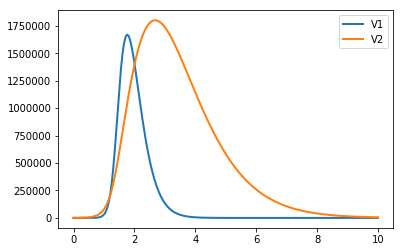

In [6]:
model3 = '''
    //Equations
    J1: T -> E1 ; B1 * T * V1 ;
    J2: T -> E2 ; B2 * T * V2 ;
    
    J3: E1 -> I1 ; k1 * E1 ;
    J4: E2 -> I2 ; k2 * E2 ;

    J5: I1 -> ; d1 * I1 ;
    J6: I2 -> ; d2 * I2 ;
    
    J7: V1 -> ; c1 * V1 ;
    J8: V2 -> ; c2 * V2 ; 
    
    J9: -> V1 ; p1*I1 ; 
    J10: -> V2 ; p2*I2 ;
    
    J11: at (time>x): V1 = V1x ;
    
    //Parameters
    B1 = 2.85 * 10^-7 ;
    B2 = 2.7 * 10^-5 ;
    k1 = 4.2 ;
    k2 = 1.27 ;
    d1 = 4.2 ;
    d2 = 1.27 ;
    c1 = 4.03 ;
    c2 = 1.27 ;
    p1 = 3.47 * 10^9 ;
    p2 = 8.71 * 10^6 ;
    x = .3 ;
    
    //Initial Conditions
    T0 = 1 ; 
    T = T0 ;
    E1 = 0 ;
    E2 = 0 ;
    I1 = 0 ;
    I2 = 0 ;
    V1 = 0 ;
    V2 = 1.14 * 10^3 ;
    V1x = 29 ;
'''
m = te.loada(model3)
s = m.simulate(0,10,200, ['Time', 'V1','V2'])
m.plot()

Look at that! By staggering the influenza infection back by just a little bit, the RSV infection not only peaks much more visibly, but its peak is even higher than the influenza’s. There’s also a visibly an amount of virus present in the lungs for much longer than when influenza dominates because RSV dies off slower.

#### Model Explanation
Modifying the model to stagger one of the two viruses is rather intuitive, though it might not seem so at first. To begin with, we need our previous double infection model and a new parameter, $x$. **The new parameter $x$ represents the amount of time that one virus will be present in the lungs without the other**. How do we fit this new parameter in? Unfortunately, unlike the previous parameter, the function that $x$ serves does not fit well into a derivative. Rather, instead we are going to set the value of the staggered virus’ starting amount to zero, making it functionally not there. While in this state, our model acts the same way as the single infection model. However, when $t$, the amount of time that has passed, reaches the value of $x$, we will then set the value of $V$<sub>staggered</sub>, the amount of virus in the lungs, equal to its starting value, effectively starting that part of the model at that point as if it were the beginning. This process neatly mirrors the way that the second infection would happen, with an amount of virus entering the body at a certain time while the other infection is already ongoing.  

#### Try It Out
The slider below staggers the virus set to V1. Take the combinations you found in the previous exercise and try to find a value of x that reverses the dynamic between those viruses. Does it take a large value of $x$? What does this tell you about the likely nature of competition for resources in these co-infections in real life?

In [7]:
def choose_virus_data(c):
    if c == 'Influenza': return [2.85*10**-7,4.2,4.2,3.47*10**9,4.03,29.0]
    elif c == 'RSV': return [2.7*10**-5,1.27,1.27,8.71*10**6,1.27,1.14*10**3]
    elif c == 'Rhinovirus': return [5.16*10**-4,.937,50.5,3.24*10**7,.92,4*10**-3]
    elif c == 'Parainfluenza': return [1.74*10**-8,13.2,13.2,5.87*10**9,.567,27.7]
    elif c == 'Metaneumovirus': return [3*10**-3,.957,29.4,4.74*10**6,26.2,.73]
    else: return [0,0,0,0,0,0]

def plot_model_double(V1,V2, x):
    m=te.loada(model3)
    vd1 = choose_virus_data(V1)
    vd2 = choose_virus_data(V2)
    m.B1 = vd1[0] ; m.B2 = vd2[0] ; m.k1 = vd1[1] ; m.k2 = vd2[1] ; m.d1 = vd1[2] ; m.d2 = vd2[2] ; m.c1 = vd1[4] ; m.c2 = vd2[4] ; m.p1 = vd1[3] ; m.p2 = vd2[3] ; m.x = x ; m.T0 = 1000 ; m.E1 = 0 ; m.E2 = 0 ; m.I1 = 0 ; m.I2 = 0 ; m.V1x = vd1[5] ; m.V2 = vd2[5]
    s=m.simulate(0,15,1000,['Time','V1','V2'])
    m.plot()#yscale='log')
    m.resetAll()

wid.interact(plot_model_double, V1=['None','Influenza','RSV','Rhinovirus','Parainfluenza','Metaneumovirus'],V2=['None','Influenza','RSV','Rhinovirus','Parainfluenza','Metaneumovirus'],
            x=wid.FloatSlider(
                            min = 0, 
                            max = 2, 
                            step=.01, 
                            description='Stagger:',
                            value=.3, continuous_update=False))
m = 3

interactive(children=(Dropdown(description='V1', options=('None', 'Influenza', 'RSV', 'Rhinovirus', 'Parainfluenza', 'Metaneumovirus'), value='None'), Dropdown(description='V2', options=('None', 'Influenza', 'RSV', 'Rhinovirus', 'Parainfluenza', 'Metaneumovirus'), value='None'), FloatSlider(value=0.3, continuous_update=False, description='Stagger:', max=2.0, step=0.01), Output()), _dom_classes=('widget-interact',))

### Think about it
Why would the variable $x$ be particularly hard to gather data for in real life? Do you think a model is a useful tool in the cases where data might be wanted? If not, what weaknesses of simulation stand out to you? Otherwise, why might the possible weaknesses of simulation not matter?